In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole

In [2]:
from psikit import Psikit

In [3]:
pk=Psikit(debug=True,threads=1,memory=12)


  Memory set to  11.176 GiB by Python driver.
  Threads set to 1 by Python driver.


In [4]:
pk.read_from_smiles('Cn1cnc2c1c(=O)n(C)c(=O)n2C')

In [5]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571174777509

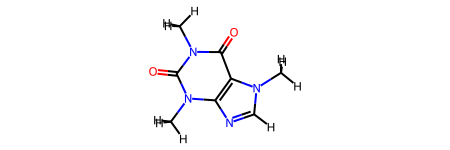

In [6]:
pk.mol

In [7]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.20810013  0.0675267   0.08393883 -0.46785215  0.12070423 -0.09084116
  0.35834394 -0.494953   -0.04696923 -0.0287763   0.3700033  -0.53027839
  0.01788366  0.01153958  0.11234479  0.11234479  0.11234479  0.17379156
  0.06012364  0.06012364  0.06012364  0.04887776  0.04887776  0.04887776]
[-0.11403352 -0.69386549  0.38638214 -0.62282364  0.63502253  0.09325533
  0.89980952 -0.63013298 -0.87906304 -0.12347222  1.09568164 -0.62726201
 -0.87748849 -0.12043555  0.16726998  0.12972956  0.1672722   0.18241308
  0.17514696  0.14565782  0.14558394  0.16748217  0.14852428  0.14934578]
[-0.1321191  -0.05264132  0.07837135 -0.27561806  0.14000198 -0.12526106
  0.29285343 -0.3940503  -0.18759221 -0.13842825  0.3479691  -0.39844372
 -0.15248971 -0.13201088  0.11679984  0.10376711  0.11774969  0.12082536
  0.12159857  0.10704074  0.10596548  0.11963418  0.10812268  0.1079551 ]


In [8]:
mol = pk.mol
atoms = mol.GetAtoms()

In [9]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [10]:
df = pd.DataFrame(data)

In [11]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.208,-0.114,-0.132
1,N,0.068,-0.694,-0.053
2,C,0.084,0.386,0.078
3,N,-0.468,-0.623,-0.276
4,C,0.121,0.635,0.140
5,C,-0.091,0.093,-0.125
6,C,0.358,0.900,0.293
7,O,-0.495,-0.630,-0.394
8,N,-0.047,-0.879,-0.188
9,C,-0.029,-0.123,-0.138


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
plt.style.use('ggplot')

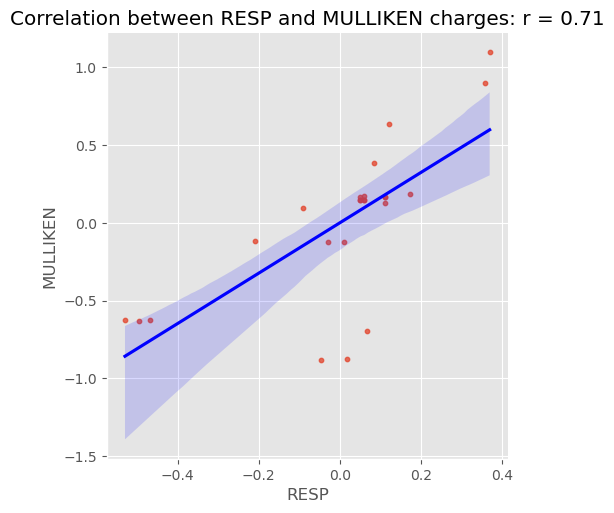

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr

# Calculate the correlation coefficient
correlation, _ = pearsonr(df['RESP'], df['MULLIKEN'])

# Scatter plot with regression line
sns.lmplot(x='RESP', y='MULLIKEN', data=df, line_kws={'color': 'blue'}, scatter_kws={'s': 10})
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.title(f'Correlation between RESP and MULLIKEN charges: r = {correlation:.2f}')

plt.show()
